# Run All

## Import dan Load

Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
import warnings

Mengganti Style

In [2]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])
warnings.filterwarnings("ignore")

In [3]:
df_jalan = pd.read_excel('https://drive.google.com/uc?id=13rLxAPa4M0IWrC1xqjbNWALmKd3gY6LL')

## Preprocessing

Mengubah nama kolom

In [4]:
df_jalan.rename(columns={'Time (s)':'Time', 'Linear Acceleration x (m/s^2)':'SumbuX','Linear Acceleration y (m/s^2)':'SumbuY', 'Linear Acceleration z (m/s^2)' : 'SumbuZ'}, inplace=True)
df_jalan.head(3)

,Time,SumbuX,SumbuY,SumbuZ
0,0.057713,0.014520,-0.030124,0.038652
1,0.072605,-0.008532,-0.008645,0.011974
2,0.087559,-0.001474,0.016658,0.028989


Menolkan sinyal sumbu Y

In [6]:
df_jalan['SumbuZ'] = df_jalan['SumbuZ'] - (df_jalan['SumbuZ'].sum() / df_jalan['SumbuZ'].shape[0])
df_jalan['SumbuY'] = df_jalan['SumbuY'] - (df_jalan['SumbuY'].sum() / df_jalan['SumbuY'].shape[0])
df_jalan['SumbuX'] = df_jalan['SumbuX'] - (df_jalan['SumbuX'].sum() / df_jalan['SumbuX'].shape[0])
df_jalan.head(3)

,Time,SumbuX,SumbuY,SumbuZ
0,0.057713,0.014465,-0.030319,0.038544
1,0.072605,-0.008588,-0.008840,0.011865
2,0.087559,-0.001530,0.016463,0.028880


## Visualisasi (Soal Nomor 1)

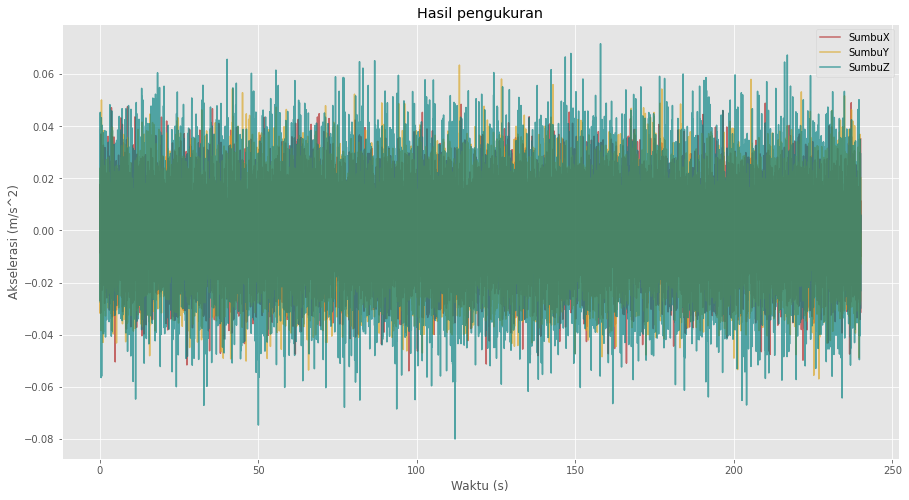

In [48]:
df_jalan.plot(x='Time', alpha=0.65, color=['firebrick', 'goldenrod', 'teal'])
plt.title("Hasil pengukuran")
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

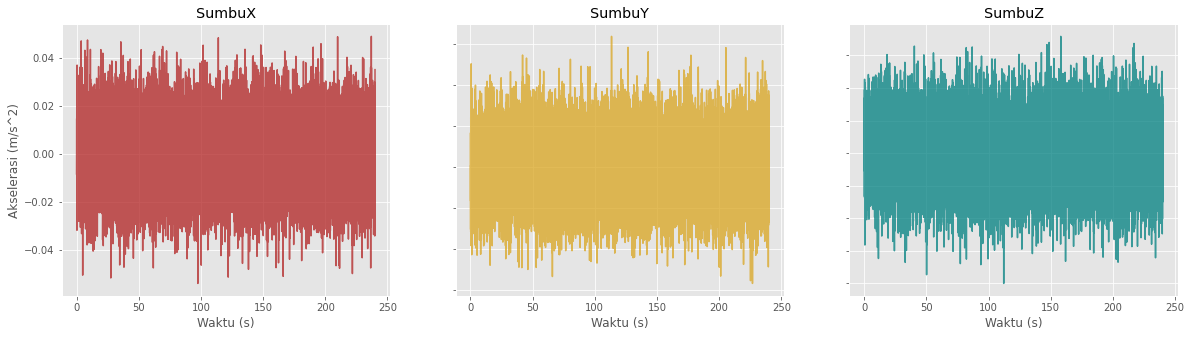

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].plot(df_jalan['Time'], df_jalan['SumbuX'], color='firebrick', alpha=0.75)
axs[0].set_title('SumbuX')
axs[1].plot(df_jalan['Time'], df_jalan['SumbuY'], color='goldenrod', alpha=0.75)
axs[1].set_title('SumbuY')
axs[2].plot(df_jalan['Time'], df_jalan['SumbuZ'], color='teal', alpha=0.75)
axs[2].set_title('SumbuZ')

for ax in axs.flat:
    ax.set(xlabel='Waktu (s)', ylabel='Akselerasi (m/s^2)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

## Sumbu Dominan (Soal Nomor 3)

In [69]:
df_jalan.describe()

,Time,SumbuX,SumbuY,SumbuZ
count,16084.000000,1.608400e+04,1.608400e+04,1.608400e+04
mean,120.031186,-1.911173e-19,-4.645810e-20,-2.408919e-19
std,69.274905,1.399827e-02,1.517950e-02,1.930380e-02
min,0.057713,-5.392940e-02,-5.698689e-02,-8.010216e-02
25%,60.042470,-9.389974e-03,-1.026513e-02,-1.306625e-02
50%,120.029900,1.065587e-04,4.474263e-05,-2.300322e-04
75%,180.019274,9.473250e-03,1.011197e-02,1.284651e-02
max,240.009787,4.901828e-02,6.349317e-02,7.170753e-02


Sumbu Z yang paling dominan saat kendaraan lewat, karena memiliki nilai minimal dan maksimal yang paling rendah/tinggi

## Tambahan Pengamatan

Nilai-nilai ekstrim

In [60]:
df_jalan[(df_jalan['SumbuX'] >= 0.04) | (df_jalan['SumbuX'] <= -0.04)].shape[0]

67

In [63]:
df_jalan[(df_jalan['SumbuY'] >= 0.0425) | (df_jalan['SumbuY'] <= -0.0425)].shape[0]

74

In [67]:
df_jalan[(df_jalan['SumbuZ'] >= 0.055) | (df_jalan['SumbuZ'] <= -0.055)].shape[0]

83